# Step 1: Import libraries

In [1]:
# importing Pandas for data manipulation
import pandas as pd
import numpy as np
# importing classification models
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# importing matplotlib for visualization
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing method to perform cross validation
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#importing methods for model evaluation
from sklearn import metrics

# Step 2: Load Dataset

In [ ]:
dataset = pd.read_csv("./Data/heart.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
dataset #target es booleano: tiene o no tiene

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Step 3: Building training and test sets

In [4]:
# My_data contains all data points from My_data set from from first feature to 12th feature(indicator features)
My_data = dataset.iloc[:,0:13] 
# My_target contains class information which is 13th feature in the data set of 
My_data_target=dataset.iloc[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(My_data, My_data_target, test_size=0.8, random_state=10)

# Step 4: Building a suit of Classification Algorithms

In [5]:
# creating a empty list
List_Classification_Models =[]
#  adding to list the instance of Logistic regression model
List_Classification_Models.append(('LR', LogisticRegression()))
#  adding to list the instance of KNN model
List_Classification_Models.append(('KNN', KNeighborsClassifier()))
#  adding to list the instance of SVM model
List_Classification_Models.append(('SVM', SVC()))
#  adding to list the instance of Naive Bayes model
List_Classification_Models.append(('NaiveBayes', GaussianNB()))
#  adding to list the instance of Decision tree
List_Classification_Models.append(('DT', DecisionTreeClassifier()))

# Step 5: Applying Cross-validation on Algorithms in Suit

In [6]:
# creating empty lists to store results of cross validation and the name of the model
Model_Eval_Score =[]
Name_of_model =[]
# applying cross validation on each algorithm in suit
for name, model_detail in List_Classification_Models:
    # intiating cross validation with 10 iterations
    kfold = KFold(n_splits=10) # OJO: 10 splits para kfolds para 300 datos es mucho, pero como es académico normal... por ahora, el profe recomienda de 5 a 7, a lo mucho 10

     # applying cross validation with 10 iterations on the training data
    CV_Results = cross_val_score(model_detail, X_train, Y_train, cv=kfold)
    # adding result of each iteration in list
    Model_Eval_Score.append(CV_Results)
    # name of the corresponding algorithm is stored as follows
    Name_of_model.append(name)

# creating DataFrame with cross validation results where each row indicates the performance 
# of the model on different cross validation iterations
CV_IterationsBy_model = pd.DataFrame(Model_Eval_Score,index=['LR','KNN', 'SVM', 'NaiveBayes', 'DT'])
print("The 10 cross validation results of each classification algoritm are: \n")
# printing the transpose of the data frame so that each column is a unique model
Table_Results_CV= pd.DataFrame(CV_IterationsBy_model.T)

Table_Results_CV

C:\Users\reusj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reusj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

The 10 cross validation results of each classification algoritm are: 



,LR,KNN,SVM,NaiveBayes,DT
0,0.833333,0.666667,0.500000,1.000000,0.500000
1,0.666667,0.666667,0.666667,0.666667,0.666667
2,0.666667,0.833333,0.500000,1.000000,0.666667
3,0.833333,0.666667,0.666667,0.833333,0.500000
4,0.666667,0.500000,0.333333,1.000000,0.333333
5,0.333333,1.000000,1.000000,0.500000,0.500000
6,0.833333,0.833333,0.500000,0.833333,0.833333
7,0.666667,0.666667,0.666667,0.500000,0.666667
8,1.000000,0.666667,0.666667,0.666667,0.666667
9,1.000000,0.833333,0.666667,0.833333,0.833333


# Step 6: Applying the Model on Test set

In [7]:
# Fitting Naive Bayes model on the Training data set
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)
# Getting prediction on train and test sets
NB_model_pred_test= NB_model.predict(X_test)
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(Y_test, NB_model_pred_test),2) * 100, "%")
print ("---------------")
# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(Y_test, NB_model_pred_test))
# Model detailed classification report
target_names = ['class 0', 'class 1']
print ("---------------")
print("Classification report", metrics.classification_report(Y_test, NB_model_pred_test,target_names =target_names))

Accuracy: 78.0 %
---------------
Confusion matrix
---------------
[[95 20]
 [34 94]]
---------------
Classification report               precision    recall  f1-score   support

     class 0       0.74      0.83      0.78       115
     class 1       0.82      0.73      0.78       128

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



# Step 7: Plotting Confusion Matrix using Seaborn

[Text(0, 0.5, 'class 0'), Text(0, 1.5, 'class 1')]

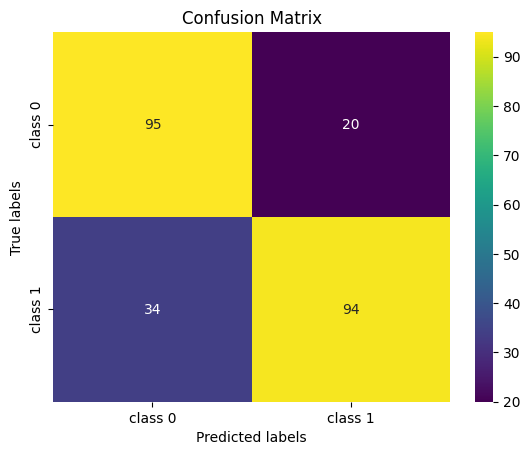

In [8]:
ax= plt.subplot()
Confusion_matrix=metrics.confusion_matrix(Y_test, NB_model_pred_test)
sns.heatmap(Confusion_matrix, annot=True, ax = ax, cmap="viridis"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['class 0', 'class 1']); ax.yaxis.set_ticklabels(['class 0', 'class 1'])

# Step 8: Plotting ROC Curve

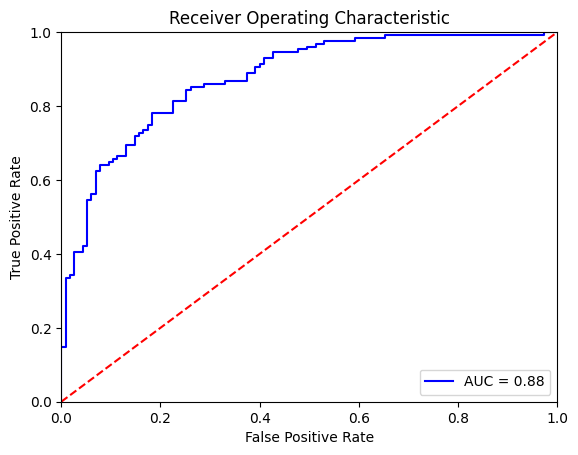

In [9]:
NB_model_pred_prob= NB_model.predict_proba(X_test)
preds = NB_model_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()